---
# CiliaQ Analyzer 
### A tool to process CiliaQ-derived data
Supplement to: Burgdorf et al (2025): Protocol for measuring cilia length in 3T3 cells using 3D Confocal fluorescence microscopy, CiliaQ-software and a quality control pipeline

**Author**: Daniel Burgdorf  
**Affiliation**:  Institute of Innate Immunity, University of Bonn  
**Contact**: [s6daburg@uni-bonn.de](mailto:s6daburg@uni-bonn.de)  
**Version**: 1.0.0 (31-03-2025)  

---

## **Abstract**
This notebook provides a step-bystep pipeline that can process CiliaQ-derived analysis results from different replicates and experimental conditions. This notebook allows pooling CiliaQ-derived CQ files from different experimental replicates and conditions, performing quality control and statistical analysis of the data and plotting all ciliary parameters in a superplot-format.   
> This pipeline is complements the workflow discribed in:  
> Burgdorf et al (2025): Protocol for measuring cilia length in 3T3 cells using 3D Confocal fluorescence microscopy, CiliaQ-software and a quality control pipeline. doi: 




This pipeline performs the following steps: 
- Data preprocessing and pooling
- Statistical analysis
- Dimensionality reduction (PCA and UMAP)
- Visualization (superplots)
- Export of figures(.svg, .png), data and configuration

For further details, please refer to the protocol paper.

---

### **Requirements**  
- Python 3.12 
- os, re, itertools, pandas, numpy, scipy, pingouin, statsmodels, scikit-posthocs, seaborn, matplotlib, scikit-learn, umap-learn, tkinter, 


**Installation and Environment Setup**: See `requirements.txt` or run:  
```bash
    pip install -r requirements.txt
```
### **Input:**  
For each experimental condition, pool all CiliaQ-derived files in one folder (via Windows Explorer or Finder on MacOS), (e.g. "DMSO", "treatment 1", "treatment 2" etc). Be careful to name the folders carefully, since their names will be displayed in the plots further downstream. 
 The CiliaQ-Analyzer will fetch the CQ.txt files, reads them as .csv files and performs the statistical analysis, quality control and plotting. Make sure that the CQ.txt files do not contain any inserted or deleted cells, rows or columns, since this could lead to errors during the analysis. For convenient analysis, ensure that the CQ.txt files are stored locally on the devide. 

### **Expected Outcomes**
- Statistical results   (statistics.csv)
- Summary file          (summary.csv)
- Configuration file    (config.csv)
- UMAP and PCA plots    (.svg/.png)
- Superplots            (.svg/.png)  
- FOR5547 Metadata summary (optional, metadata.csv)

---

### **1. Pipeline Setup**:
When this pipeline is being executed, CiliaQ Analyzer requests to select the directories of the prepared folders, each containing the CiliaQ-derived data for all replicates of one experimental condition. Selected directories are displayed in the dialog, until you click "apply".  
Once applied, the Analyzer request to select the measurements to include into the analysis, a FOR5547-metafile (if applicable) and gives the possibility to choose the Analyzer to perform automated statistics (see below).   

In [1]:
from main import Analyzer

c:\Users\danie\OneDrive\Universität\Labor\SHK Wachten\CiliaQ Streamline Paper\CiliaQ Analyzer\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
analyzer = Analyzer()
analyzer.setup_analyzer()

['Channel A/B:', 'Cilia Markers', 'Morphology', 'Spatial Parameters']


---

### **Data import**:
Once set up, the CiliaQ Analyzer imports the CiliaQ-derived measurements from the .csv files in the selected folders. For each replicate and measurement, the data is concatenated and prepared for further analysis.  

In [3]:
# pool data
analyzer.import_data()

Parameter B: Colocalized volume [micron^3] (if channel in input image was background-removed) was not found in all replicates that were feeded to the analysis. Statistics and Plotting is not possible.
Parameter B: Colocalized volume [% total volume] (if channel in input image was background-removed) was not found in all replicates that were feeded to the analysis. Statistics and Plotting is not possible.
Parameter B: Colocalized compared to BG volume [micron^3] was not found in all replicates that were feeded to the analysis. Statistics and Plotting is not possible.
Parameter B: Colocalized compared to BG volume [% total volume] was not found in all replicates that were feeded to the analysis. Statistics and Plotting is not possible.
Parameter minimum B intensity was not found in all replicates that were feeded to the analysis. Statistics and Plotting is not possible.
Parameter maximum B intensity was not found in all replicates that were feeded to the analysis. Statistics and Plotting

c:\Users\danie\OneDrive\Universität\Labor\SHK Wachten\CiliaQ Streamline Paper\CiliaQ Analyzer\datagroup.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.pooledData = pd.concat([self.pooledData, aligned_data], ignore_index=True)
c:\Users\danie\OneDrive\Universität\Labor\SHK Wachten\CiliaQ Streamline Paper\CiliaQ Analyzer\datagroup.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.pooledData = pd.concat([self.pooledData, aligned_data], ignore_index=True)
c:\Users\danie\OneDrive\Un

---

### **Statistics**:
If selected, the Analyzer performs statistical analysis of the selected measurements. Based on the number of compared conditions and assessment of normal distribution and homogeniety of variance, the algorithm determines which statistical test to choose, based on this decision tree:

In [4]:
analyzer.perform_statistics()

c:\Users\danie\OneDrive\Universität\Labor\SHK Wachten\CiliaQ Streamline Paper\CiliaQ Analyzer\stat_analysis.py:230: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  des_stat = pd.concat([des_stat, stats_temp], ignore_index = True)
c:\Users\danie\OneDrive\Universität\Labor\SHK Wachten\CiliaQ Streamline Paper\CiliaQ Analyzer\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\danie\OneDrive\Universität\Labor\SHK Wachten\CiliaQ Streamline Paper\CiliaQ Analyzer\.venv\Lib\site-packages\scipy\stats\_morestats.py:3057: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom
c

---

### **Dimensionality Reduction**
The CiliaQ Analyzer aims to use the extensive measurements ontained by CiliaQ to perform dimensionality reduction on a single cilium level. The pipeline both transforms the dtaa linearly (Principle Component Analysis, PCA) and non-linearly (Uniform Manifold Approximation and Projection, UMAP).

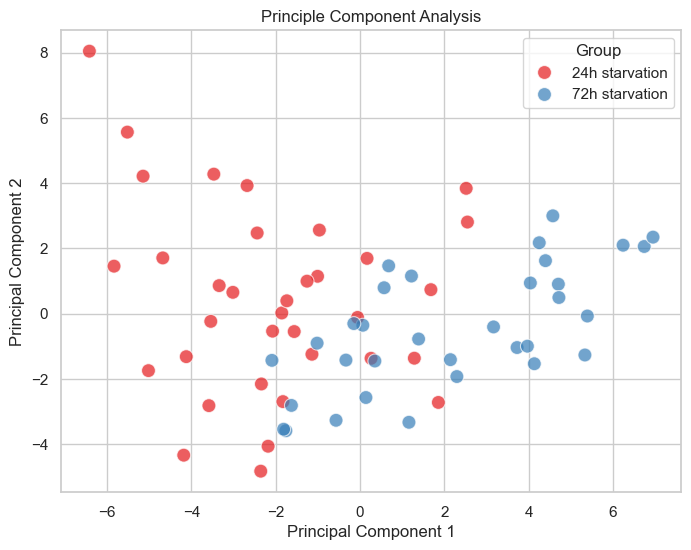

c:\Users\danie\OneDrive\Universität\Labor\SHK Wachten\CiliaQ Streamline Paper\CiliaQ Analyzer\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\danie\OneDrive\Universität\Labor\SHK Wachten\CiliaQ Streamline Paper\CiliaQ Analyzer\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


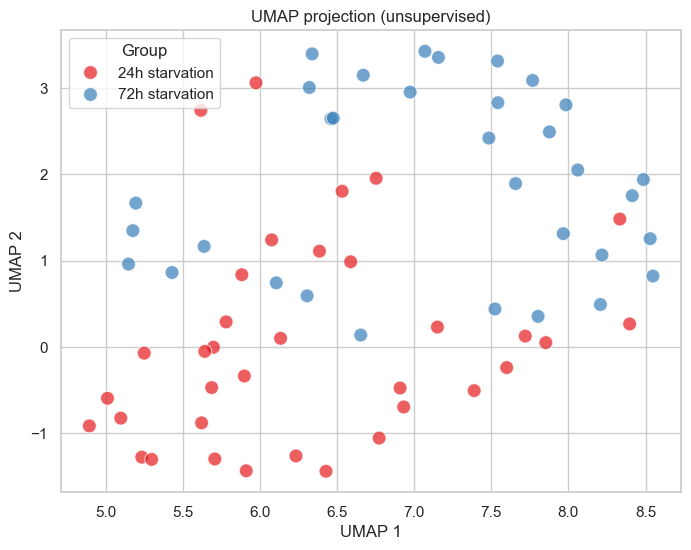

In [5]:
analyzer.perform_PCA()
analyzer.perform_UMAP()

---

### **Quality Control**

In [6]:
analyzer.perform_qc()

---

### **Plotting**
To visualize all replicates and conditions, the CiliaQ Analyzer will plot all selected measurements using superplots. Following the guide provided by [Lord et al. (2020)](10.1083/jcb.202001064), the scatterplots  indicate the replicate ontogeny by color to visually assess reproducability. Moreover, the plots are underlayed with violinplots containing both the median and upper/lower quantile to emphasize the data distribution. 



[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

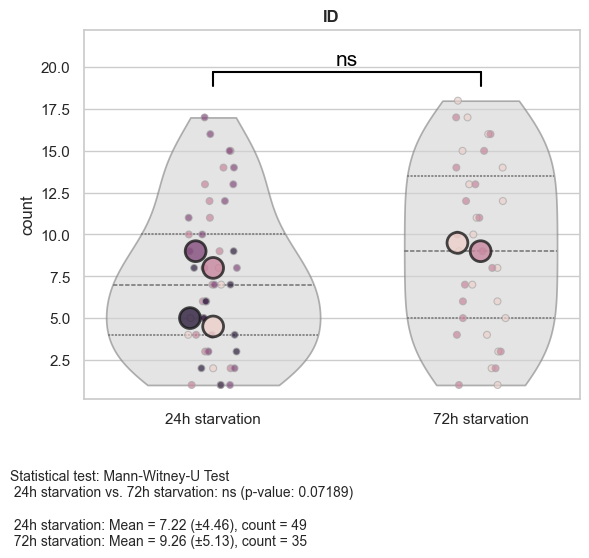

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

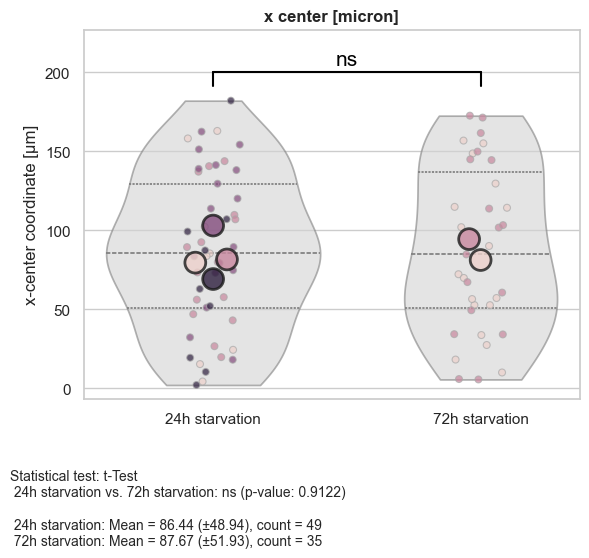

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

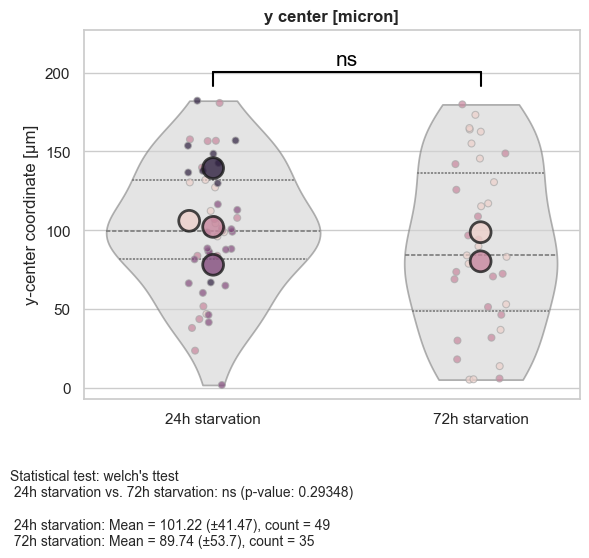

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

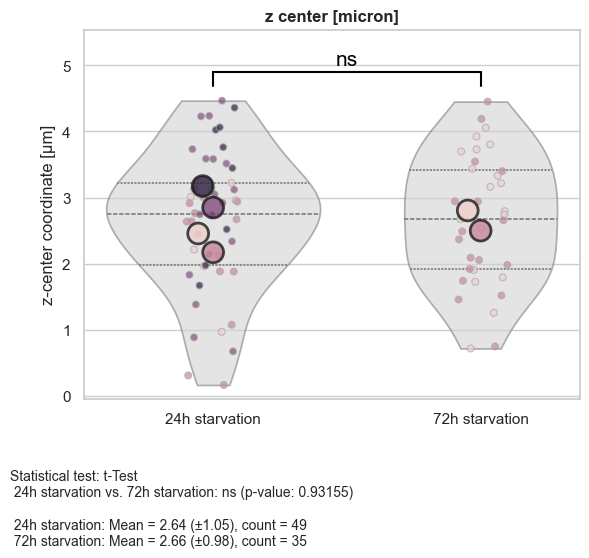

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

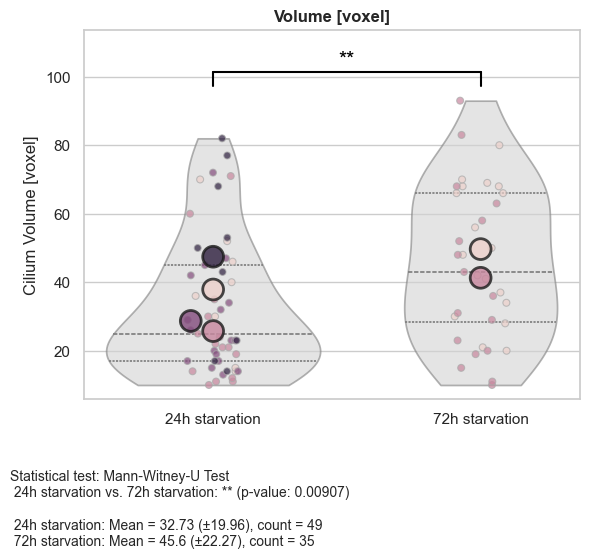

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

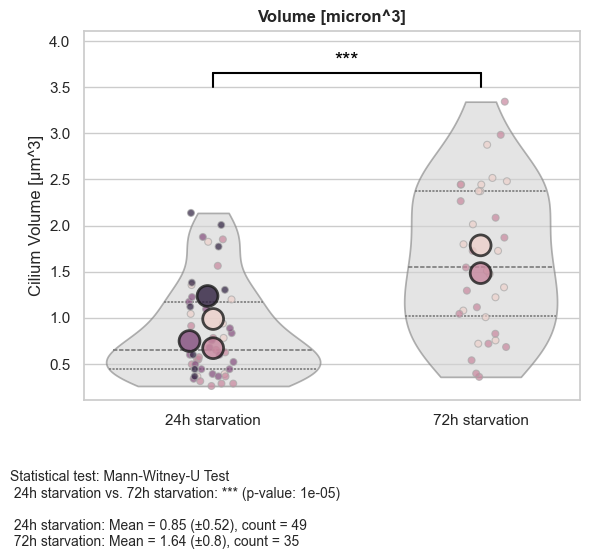

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

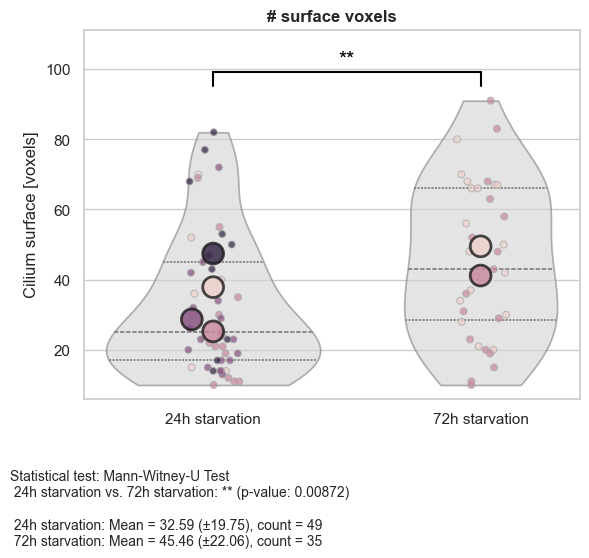

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

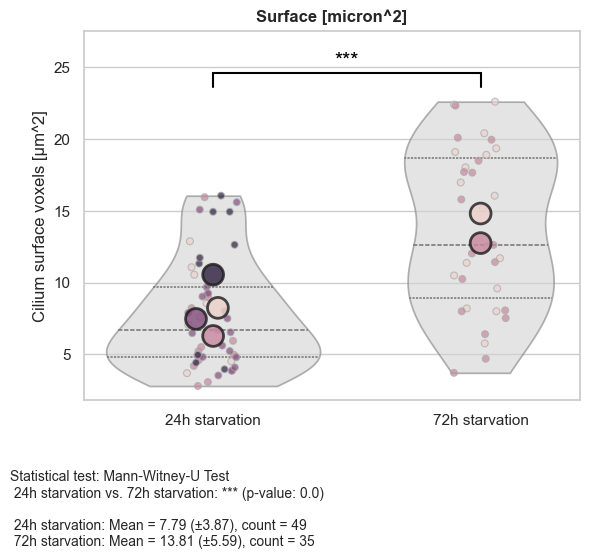

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

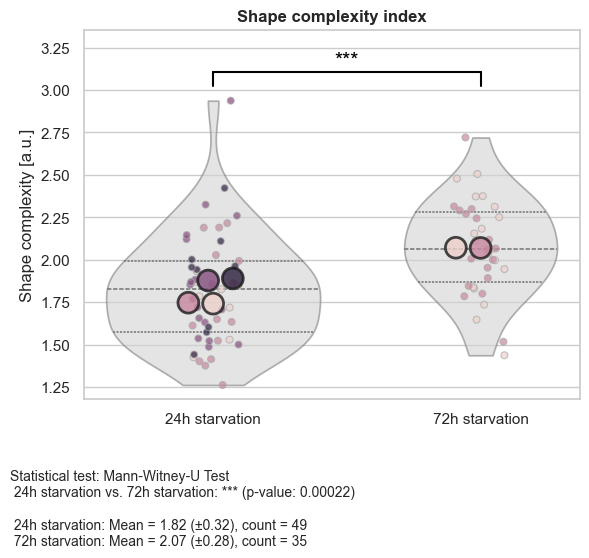

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

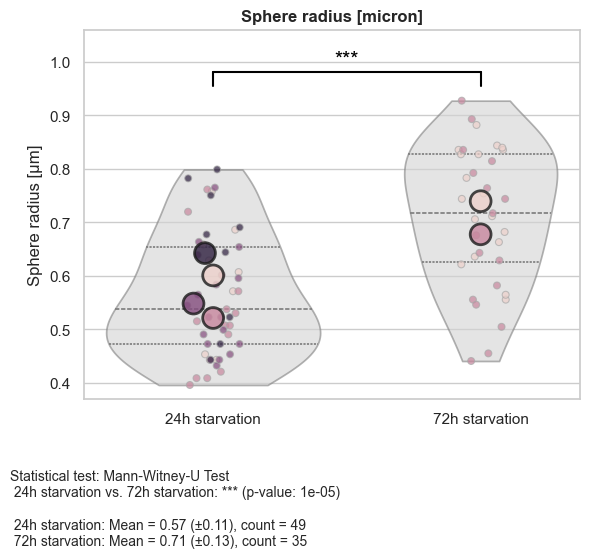

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

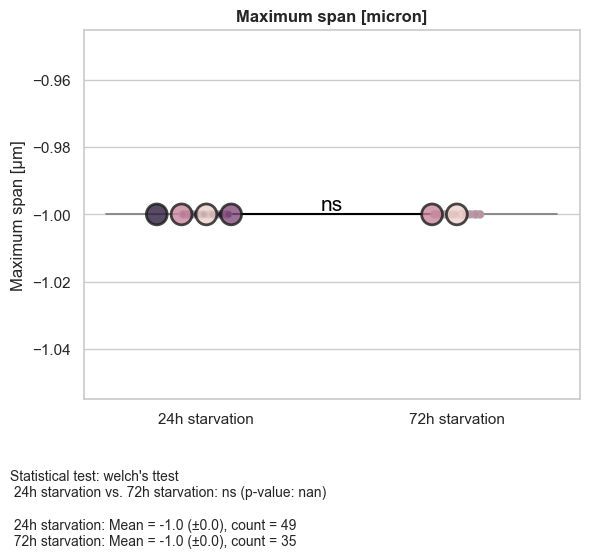

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

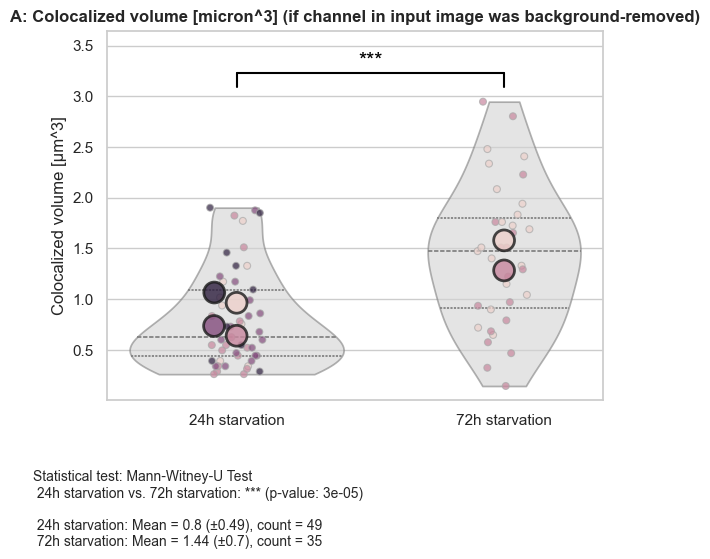

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

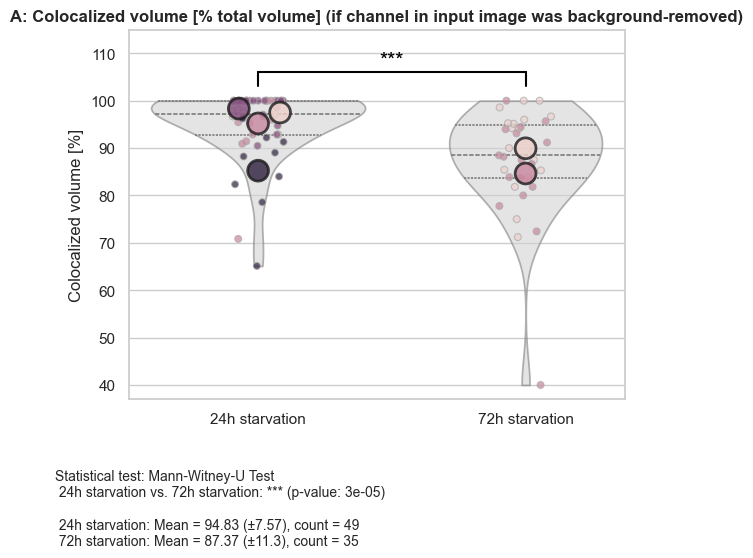

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

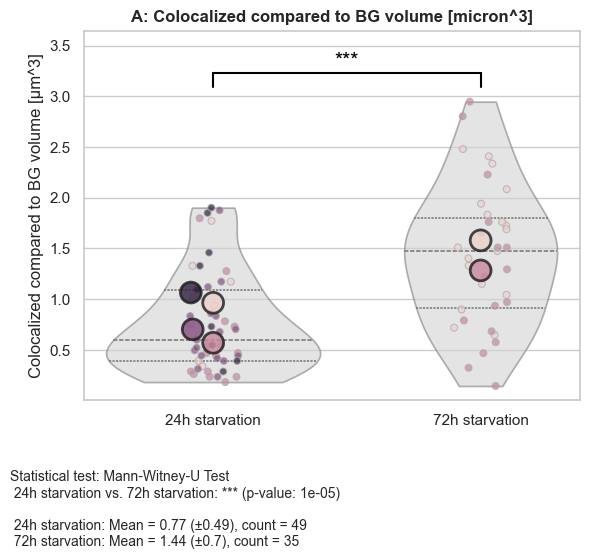

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

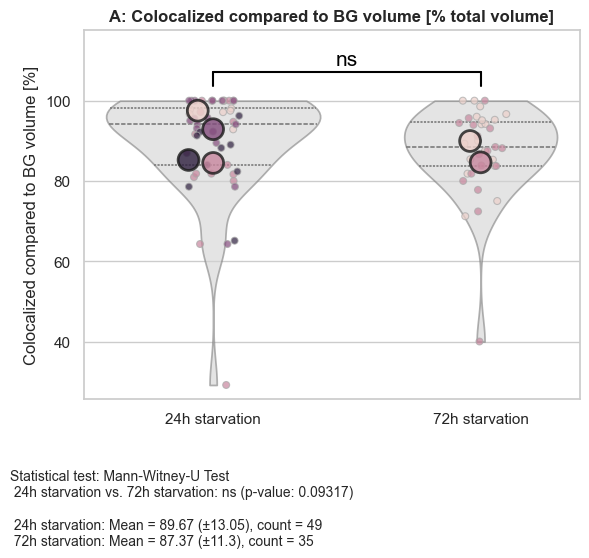

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

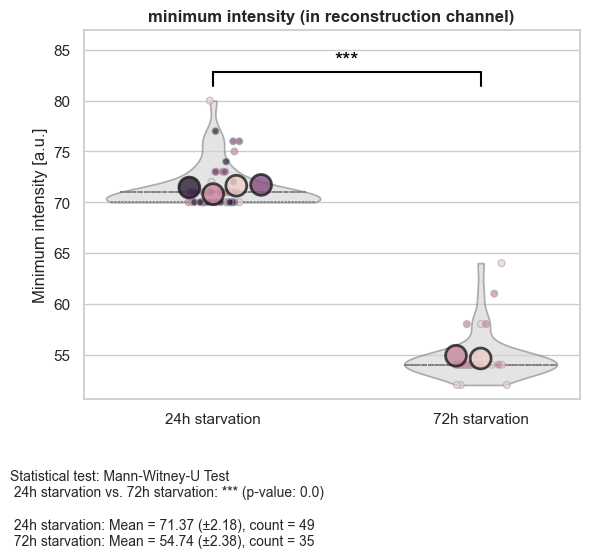

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

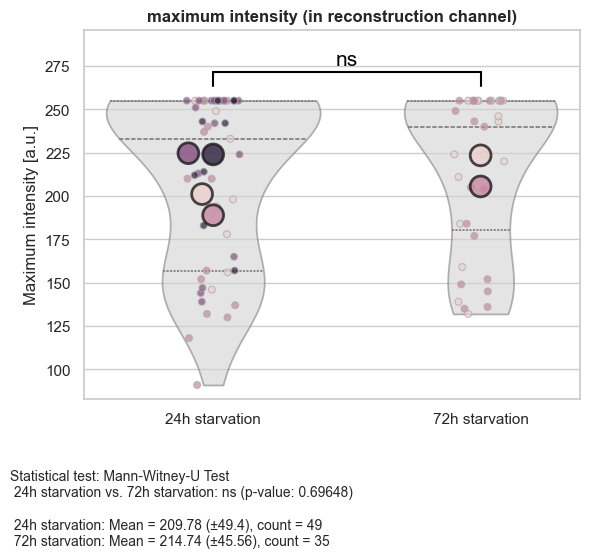

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

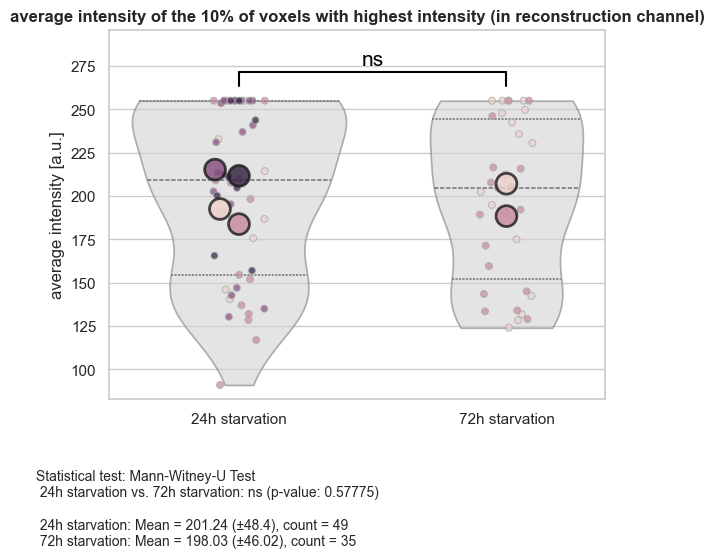

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

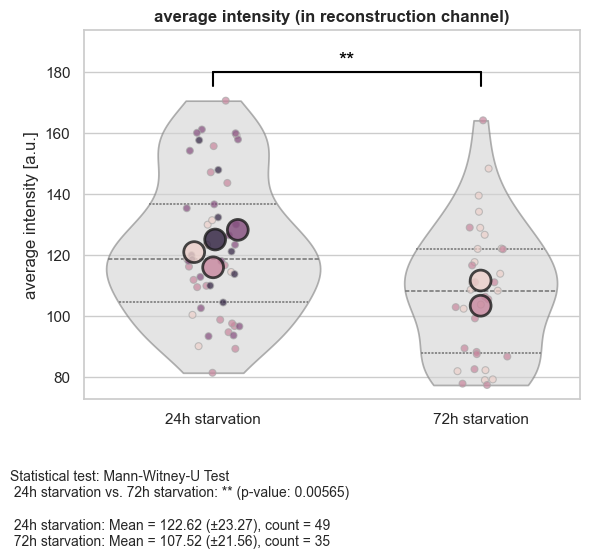

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

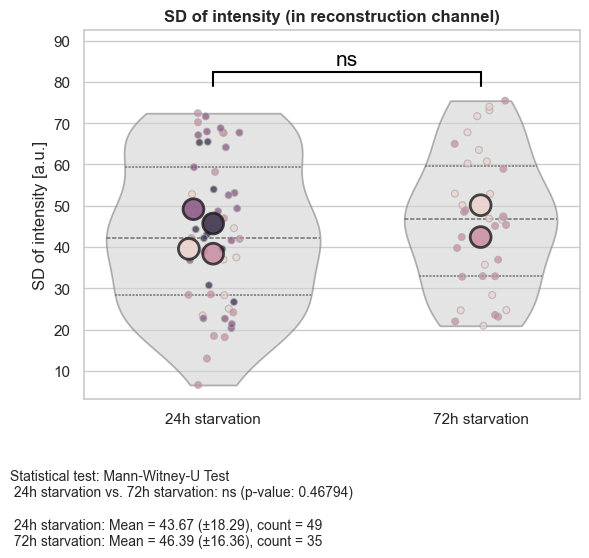

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

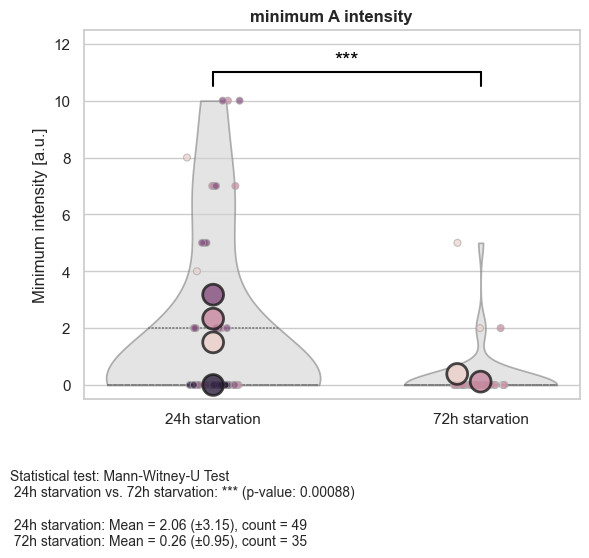

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

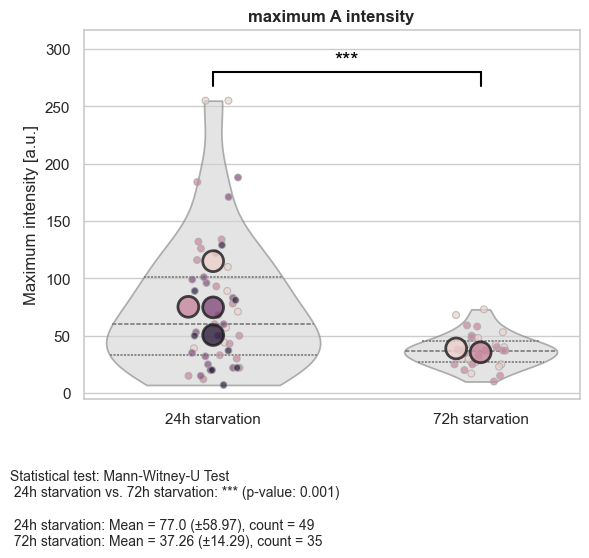

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

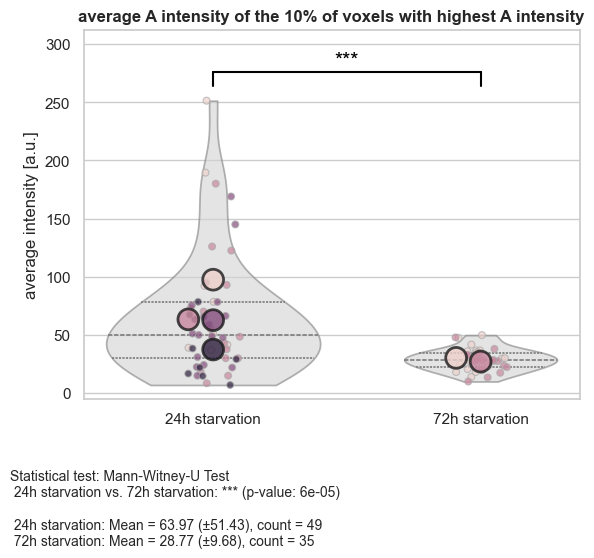

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

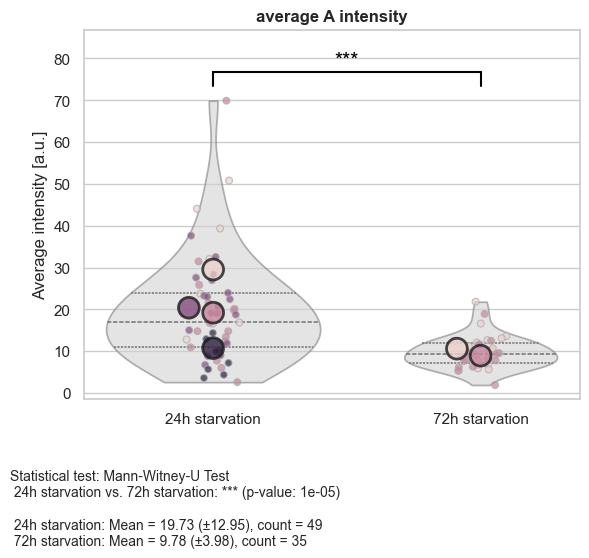

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

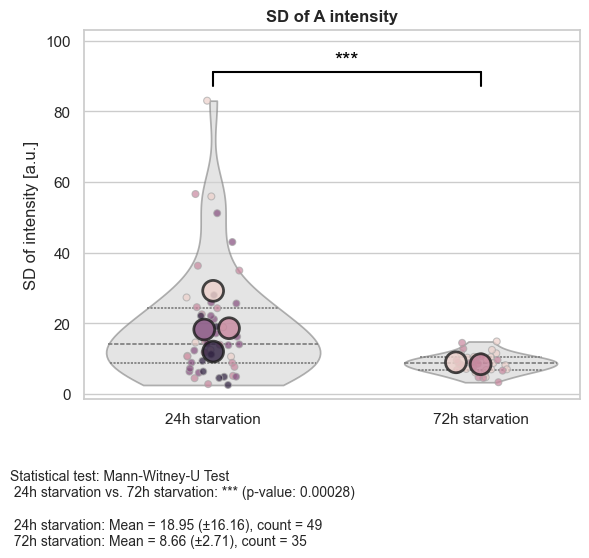

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

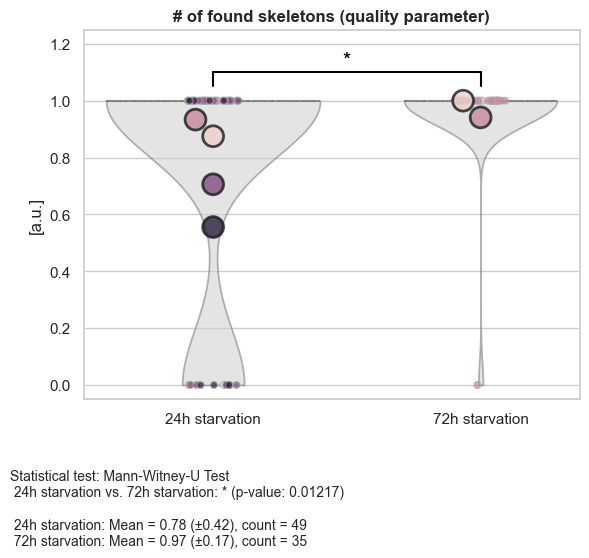

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

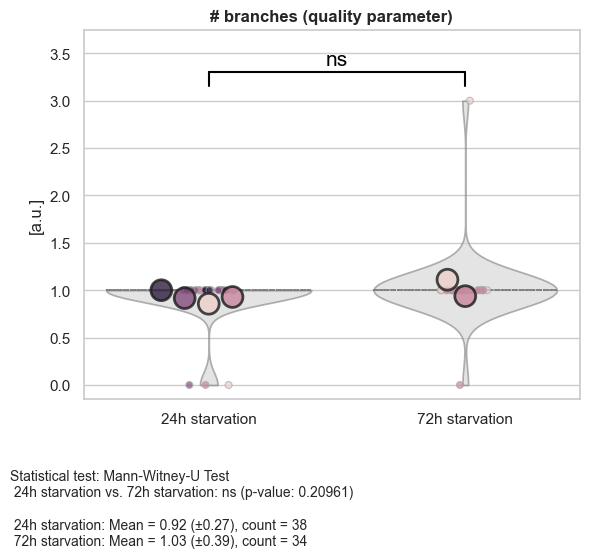

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

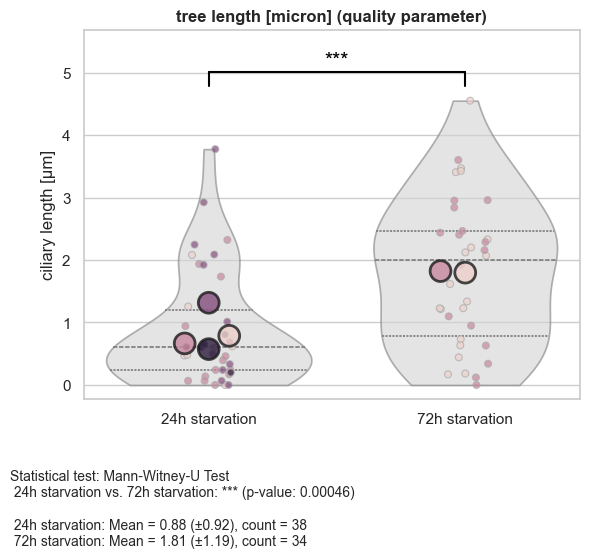

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

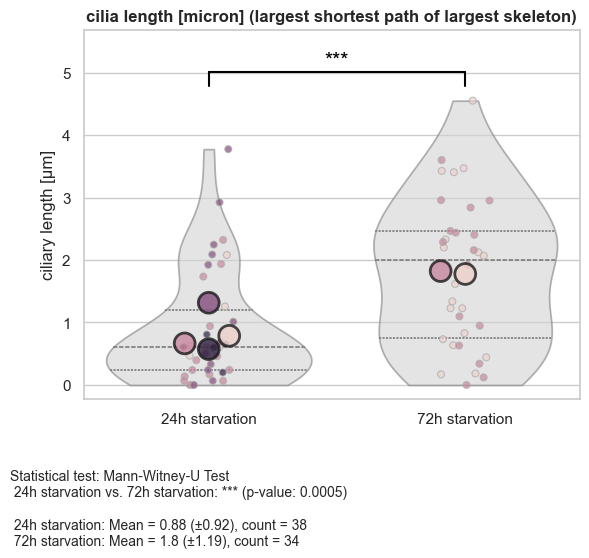

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

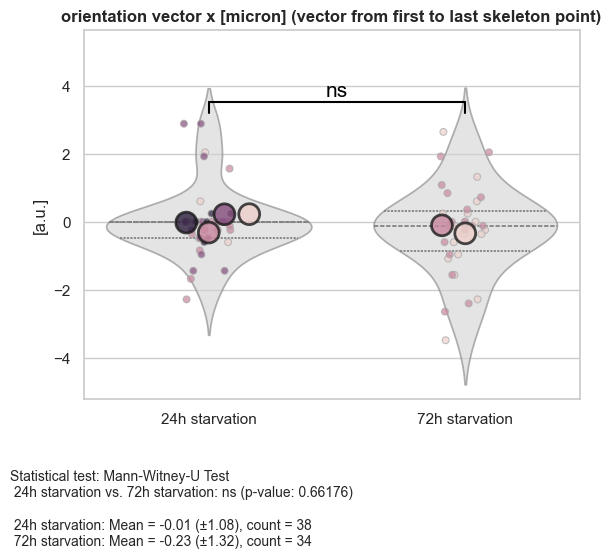

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

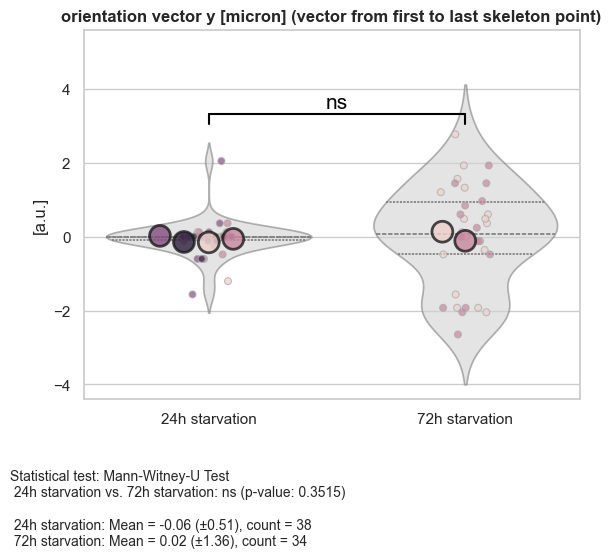

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

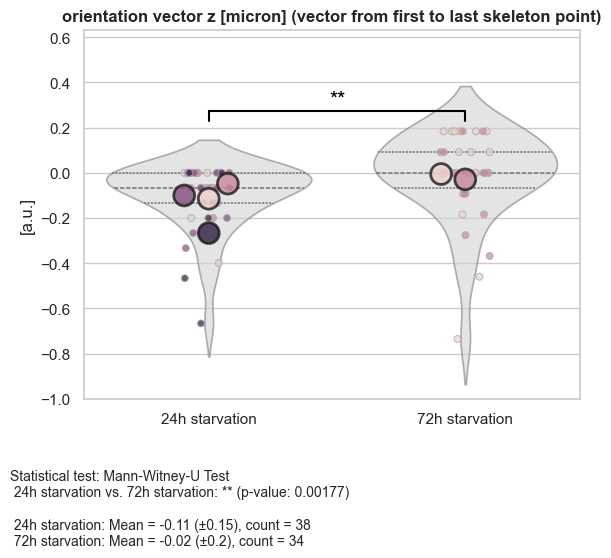

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

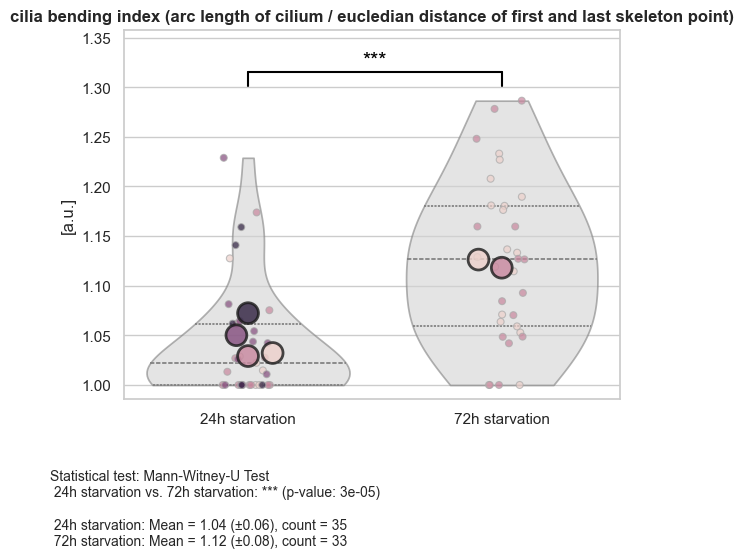

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

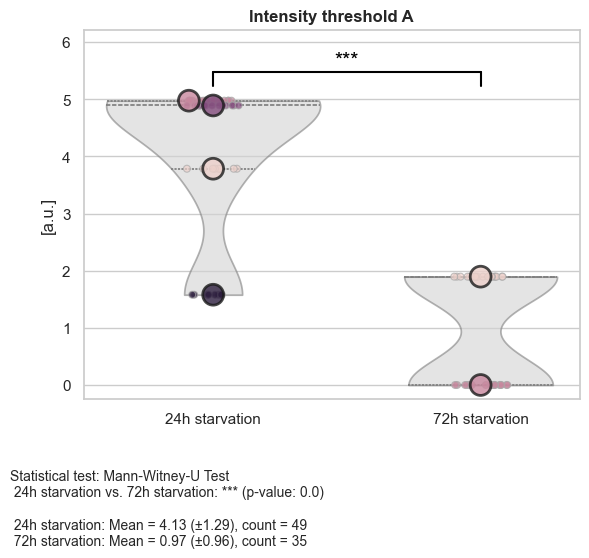

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

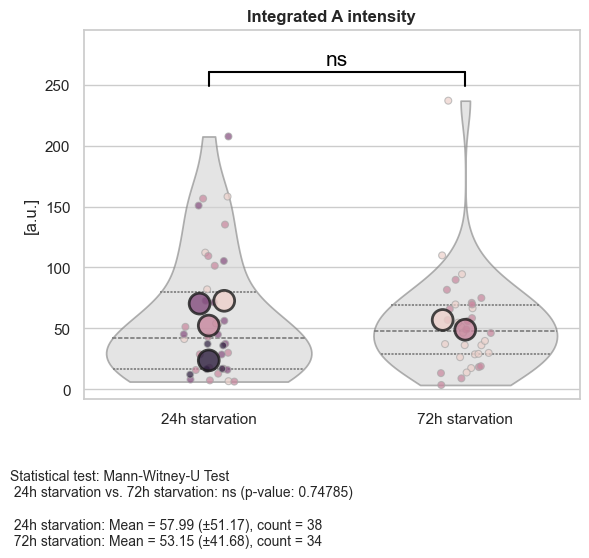

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

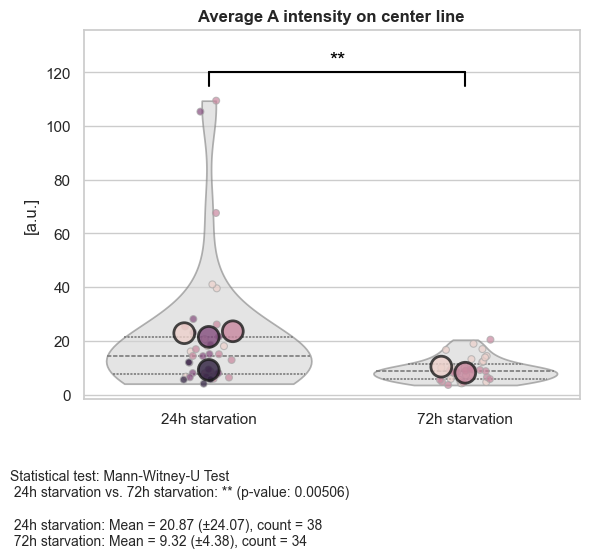

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

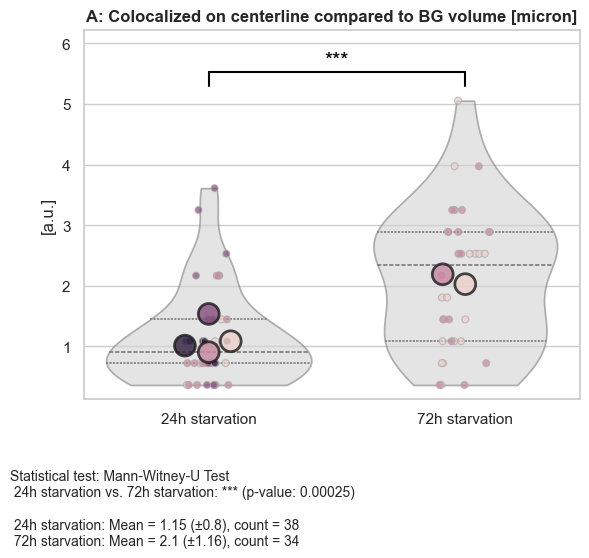

[{'measurement': 'ID', 'Norm. distribution': False, 'Homogeneity of Variance': True, 'hypothesis test': 'Mann-Witney-U Test', 'test-stat': np.float64(659.0), 'p-value': np.float64(0.07189182799718621), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.07189182799718621)]}}, {'measurement': 'x center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': True, 'hypothesis test': 't-Test', 'test-stat': np.float64(-0.11060602531885505), 'p-value': np.float64(0.9121990351578664), 'compared_groups': '24h starvation-72h starvation', 'asterisks': 'ns', 'pairwise': {'24h starvation vs 72h starvation': ['ns', np.float64(0.9121990351578664)]}}, {'measurement': 'y center [micron]', 'Norm. distribution': True, 'Homogeneity of Variance': False, 'hypothesis test': "welch's ttest", 'test-stat': np.float64(1.0596232745815282), 'p-value': np.float64(0.29347600016958564), 'compared_groups': '24h starvati

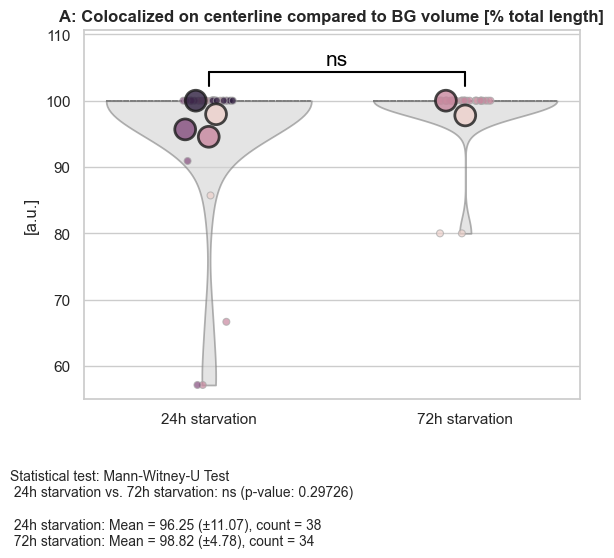

In [7]:
#Plot grouped data
analyzer.plot_superplot()

---

### **Summary Export**
Finally, the data which was processed by the CiliaQ Analyzer is exported as .csv files.
##### **Output**:
| **Description**               | **File Format**      | **Details** |
|-------------------------------|----------------------|-------------|
| **Statistical results**        | `(statistics.csv)`   | contains mean, standard deviation, p-values, details about the performed test, etc. |
| **Summary file**               | `(summary.csv)`      | contains raw data for each replicate and measurement, which was used for statisticsal analysis and plotting |
| **Configuration file**         | `(config.csv)`       | Stores the CiliaQ Analyzer settings needed to reproduce the analysis |
| **UMAP and PCA plots**         | `(.svg/.png)`        | Visualization of dimensionality reduction* |
| **Superplots**                 | `(.svg/.png)`        |   |
| **FOR5547 Metadata summary**   | `(metadata.csv)`     | Contains key experimental metadata, if a FOR5547-metafile was supplied |
| **Measurement files**          | `(.csv)`            | contains the raw data behind each plot, useful during publication |


In [8]:
analyzer.write_summary()
analyzer.write_config()
analyzer.write_for5547_summary()

   average intensity (in reconstruction channel)  \
0                                     123.277778   
1                                     129.865385   
2                                     118.600000   
3                                     131.326087   
4                                     159.228571   
5                                     114.333333   
6                                      90.000000   
7                                     100.266667   

   Profile A (arc length step: 0.361103)  # surface voxels  \
0                              39.040651              36.0   
1                                    NaN              52.0   
2                              22.799268              40.0   
3                              21.962963              46.0   
4                               3.777778              70.0   
5                              27.925926              30.0   
6                               6.666667              14.0   
7                              15.0

---

---

### **References**

1. Paper reference
2. Package references

---

### **License**  
This pipeline is released under the [CC-BY 4.0] License. You are free to use, share, and adapt with attribution.

### **Citation**  
If you use this pipeline, please cite our protocol paper:  
> 

Example BibTeX:
```bibtex
@article{YourPaper,
  author    = {Your Name and Others},
  title     = {Your Protocol Paper Title},
  journal   = {Star Protocols},
  year      = {2025},
  doi       = {DOI here}
}